# Microsoft Movie Analysis

**Authors:** Elena Burlando


## Overview

The objective of this project is to analyze movie data to provide insights on movie types that have performed best in the past decade. 

As an outcome of this analysis we are hoping to get: 
* Produced: 
 * Top 10 most produced genres during 2010-2020 (by entry count).
 * Top 2 most produced genres for each year (by entry count).
* Popularity: 
 * Top 10 most popular movies and genres during 2010-2019 (by number of votes). 
* Rating:
 * Top 10 highest rated genres during 2010-2019.
 * Top 10 highest rated movies during 2010-2019. 
 * Correlation between ratings and number of votes. 
* Gross Income and ROI:
 * Movies/genres with the highest domestic gross income. 
 * Movies/genres with the highest foreign gross income.
 * Correlation between domestic and foreign gross income.
 * Movies/genres with the highest ROI (return on investment). 



## Business Problem

Microsoft following the success of other big tech companies is considering setting up a movie studio. This project is aiming to provide valuable information to the head of Microsoft's new movie department in the areas of movies, genres, and ROI. 

***
One of the main business pain points related to this project is lack of experince in the movie industry and using 
data from other sources since it doesn't have any of its own. I picked the questions above as I think the answers to those would be the most beneficial when starting from scratch. They will provide high level overview of the industry and trends. 
***

## Data Understanding

For this project we will be using data from: 
* [IMDB](https://www.imdb.com/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

Variables included: movie titles, release year, genres, runtime minutes, ratings, number of votes, and gross income (domestic and foreign) made of movies from 2010 through 2020.
***
* Using these sources we would be able to answer our questions listed above. 
* The target variables are the top performing movie titles and genres. 
* We intend to use max and mean of variables, and Pearson correlation. 
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### During Data Understanding stage we will read and preview our data sources. 
*** 
We will be using these methods for each dataset:
* .read_csv()
* .shape() 
* .info()
* .describe()
***

## imdb_title_basics dataset

In [2]:
imdb_title_basics=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_title_basics.shape

(146144, 6)

In [4]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


*** 
#### Data Cleaning tasks for imdb_title_basics: 
* 'original_title' has 21 null values
* 'runtime_minutes' has 31,739 null values 
* 'genres' has 5,408 null values
***

## imdb_title_ratings dataset


In [6]:
imdb_title_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
imdb_title_ratings.shape

(73856, 3)

In [8]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


***
#### Data Cleaning tasks for imdb_title_ratings: 
* none
***

## bom_movie_gross dataset


In [10]:
bom_movie_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
bom_movie_gross.shape

(3387, 5)

In [12]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
# Descibe method needs to be rerun in data cleaning stage after converting column 'foregn_gross' to float. 
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


***
#### Data Cleaning tasks for bom_movie_gross: 
    * 'studio' has 5 null values
    * 'domestic_gross' has 28 null values
    * 'foreign_gross' has 1,350 null values and needs to be converted to float
***

## tn_movie_budgets dataset

In [14]:
tn_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn_movie_budgets.shape

(5782, 6)

In [16]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
# needs to rerun it after cleaning up data. We will convert columns: production_budget, domestic_gross, and 
# worldwide_gross to floats.  
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


***
#### Data Cleaning tasks for tn_movie_budgets: 
    * 'production_budget' needs to be converted to float
    * 'domestic_gross' needs to be converted to float
    * 'worldwide_gross' needs to be converted to float
***

## Data Preparation
***
Following steps: 
* .info() method
* Null values
* Check on dublicates
* Check on outliers
***

### Data Preparation: imdb_title_basics dataset
***
According to our previous note 'Data Cleaning tasks for imdb_title_basics':
* 'original_title' has 21 null values
* 'runtime_minutes' has 31,739 null values
* 'genres' has 5,408 null values
* check on dublicates
* check on outliers

Since 'primary_title' doesn't have any missing values, we will ignore null values of 'original_title' and keep them as is.

We will convert null values of 'runtime minutes' to mean value, but we won't be using this data for this project.

'genres' column is missing 5,408 out of 146,144 values. This is equavalent to 3.5%. Since we are trying to figure out the top genres produced by count, we will drop null values. 
***

In [18]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
imdb_title_basics.runtime_minutes.fillna(imdb_title_basics.runtime_minutes.mean(), inplace=True)

In [21]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [23]:
imdb_title_basics = imdb_title_basics[imdb_title_basics['genres'].notna()]
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy


In [24]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [25]:
imdb_title_basics_dublicates = imdb_title_basics[imdb_title_basics.duplicated()]
print(len(imdb_title_basics_dublicates))
imdb_title_basics_dublicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [26]:
imdb_title_basics.start_year.unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2026, 2025, 2115, 2027, 2024])

In [27]:
imdb_title_basics.start_year.value_counts()

2017    16816
2016    16353
2018    16293
2015    15569
2014    15095
2013    14298
2012    13356
2011    12432
2010    11452
2019     8058
2020      900
2021       83
2022       23
2023        3
2027        1
2026        1
2024        1
2025        1
2115        1
Name: start_year, dtype: int64

In [28]:
imdb_title_basics = imdb_title_basics[imdb_title_basics.start_year <= 2020]
imdb_title_basics[imdb_title_basics.start_year > 2020]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [29]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140622 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140622 non-null  object 
 1   primary_title    140622 non-null  object 
 2   original_title   140620 non-null  object 
 3   start_year       140622 non-null  int64  
 4   runtime_minutes  140622 non-null  float64
 5   genres           140622 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


## Merginng two dataframes: imdb_title_basics and imdb_title_ratings on common column 'tconst'. 
It will be easier to parse through information once two dfs are combined. 

In [30]:
imdb_title_raiting_basics_df = imdb_title_basics.merge(imdb_title_ratings, on="tconst", how="inner")
imdb_title_raiting_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [31]:
imdb_title_raiting_basics_df.shape

(73052, 8)

In [32]:
imdb_title_raiting_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [33]:
#basic stats
imdb_title_raiting_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,93.874636,6.330930,3.562173e+03
std,2.615288,198.608438,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,5.000000e+01
75%,2017.000000,102.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [34]:
#df with over 100 reviews per movie to check on correlation between numvotes and averagerating.
imdb_df_over_100_votes = imdb_title_raiting_basics_df.loc[imdb_title_raiting_basics_df['numvotes'] > 100]
imdb_df_over_100_votes

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
...,...,...,...,...,...,...,...,...
73037,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73038,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
73039,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
73046,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


## Merging bom_movie_gross and imdb_title_raiting_basics_df

In [35]:
bom_movie_gross.rename(columns={'title':'original_title'}, inplace=True)
bom_movie_gross.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [36]:
#merging bom_movie_gross and imdb_title_raiting_basics_df
imdb_title_raiting_basics_gross_df = imdb_title_raiting_basics_df.merge(bom_movie_gross, on="original_title", \
                                                                        how="inner")
imdb_title_raiting_basics_gross_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [37]:
imdb_title_raiting_basics_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2443 non-null   object 
 1   primary_title    2443 non-null   object 
 2   original_title   2443 non-null   object 
 3   start_year       2443 non-null   int64  
 4   runtime_minutes  2443 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2443 non-null   float64
 7   numvotes         2443 non-null   int64  
 8   studio           2440 non-null   object 
 9   domestic_gross   2425 non-null   float64
 10  foreign_gross    1569 non-null   object 
 11  year             2443 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 248.1+ KB


## Cleaning up data

In [38]:
bom_movie_gross_dropped_na = bom_movie_gross.dropna()

In [39]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [40]:
bom_movie_gross_dropped_na.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [41]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)

<ipython-input-41-b3c99fdef75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)


In [42]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)

<ipython-input-42-005ff372db55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)


In [43]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [44]:
bom_movie_gross_dropped_na.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


### Data Preparation: tn_movie_budgets

In [45]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [46]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [47]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '', regex=True)

In [48]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '', regex=True)

In [49]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(float)

In [50]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [69]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '', regex=True)

In [70]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '', regex=True)

In [71]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype(float)

In [73]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '', regex=True)

In [74]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '', regex=True)

In [75]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(float)

In [76]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [77]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [78]:
tn_movie_budgets['foreign_gross'] = tn_movie_budgets.worldwide_gross - tn_movie_budgets.domestic_gross

In [79]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [81]:
tn_movie_budgets['ROI'] = tn_movie_budgets.worldwide_gross - tn_movie_budgets.production_budget
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Question 1 & 2
***
We will start by finding the answers for Questions 1 and 2. To answer these questions we only need the first dataset: imdb_title_basics. 
* Top 10 most produced genres during 2010-2020 (by entry count).
* Top 2 most produced genres for each year (by entry count).
***

In [51]:
most_produced = imdb_title_basics.genres.value_counts()
most_produced.iloc[:10]

Documentary              32181
Drama                    21474
Comedy                    9174
Horror                    4368
Comedy,Drama              3517
Thriller                  3045
Action                    2207
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

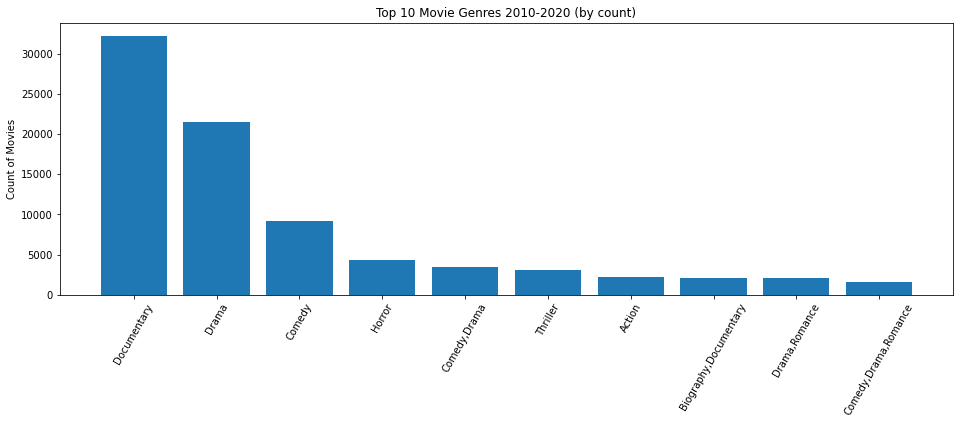

In [52]:
# Set up plots
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
top_10_counts = most_produced.iloc[:10]

# Plot data
ax.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=60)
ax.set_ylabel("Count of Movies")
ax.set_title("Top 10 Movie Genres 2010-2020 (by count)");

### Q2: Top two most produced genres for each year (by entry count)

In [53]:
top_produced_by_each_year = imdb_title_basics[['start_year', 'genres']].copy()
top_produced_by_each_year.head()

,start_year,genres
0,2013,"Action,Crime,Drama"
1,2019,"Biography,Drama"
2,2018,Drama
3,2018,"Comedy,Drama"
4,2017,"Comedy,Drama,Fantasy"


In [54]:
top_produced_by_each_year = top_produced_by_each_year.set_index('start_year')
top_produced_by_each_year.head()

,genres
start_year,
2013,"Action,Crime,Drama"
2019,"Biography,Drama"
2018,Drama
2018,"Comedy,Drama"
2017,"Comedy,Drama,Fantasy"


In [55]:
top_produced_by_each_year_df = top_produced_by_each_year.groupby(['start_year'])
top_produced_by_each_year_df.head()

,genres
start_year,
2013,"Action,Crime,Drama"
2019,"Biography,Drama"
2018,Drama
2018,"Comedy,Drama"
2017,"Comedy,Drama,Fantasy"
2018,Comedy
2017,"Horror,Thriller"
2017,"Adventure,Animation,Comedy"
2012,"Documentary,History"


In [56]:
top_prod_by_year = top_produced_by_each_year_df.apply(lambda x: x.value_counts(["genres"]))
top_prod_by_year

start_year  genres               
2010        Documentary              2507
            Drama                    1812
            Comedy                    738
            Comedy,Drama              298
            Horror                    283
                                     ... 
2020        Comedy,Crime                1
            Comedy,Crime,Horror         1
            Comedy,Crime,Mystery        1
            Romance,Thriller            1
            Biography,Drama,Sport       1
Length: 5787, dtype: int64

In [57]:
top_two_prod_by_year = top_prod_by_year.groupby('start_year').head(2)
top_two_prod_by_year

start_year  genres     
2010        Documentary    2507
            Drama          1812
2011        Documentary    2649
            Drama          1909
2012        Documentary    2721
            Drama          2045
2013        Documentary    2561
            Drama          1941
2014        Documentary    2805
            Drama          1980
2015        Documentary    3836
            Drama          2228
2016        Documentary    4405
            Drama          2423
2017        Documentary    4644
            Drama          2652
2018        Documentary    4196
            Drama          2867
2019        Documentary    1782
            Drama          1449
2020        Drama           168
            Comedy           78
dtype: int64

### Conclusion on Questions 1 & 2
***
The most produced genres for a decade of 2010-2020 and annually during this period are: Documentary and Drama. 
***

## Question 3: Top 10 most popular movies & genres during 2010-2019 (by number of votes).

In [58]:
# Top 10 rated movies in 2010-2019 based on the max number of votes
imdb_numvotes = imdb_title_raiting_basics_df.groupby(['genres']).max().sort_values('numvotes', ascending=False)
imdb_numvotes.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
genres,,,,,,,
"Action,Adventure,Sci-Fi",tt9301884,Zombie Ninjas vs Black Ops,Zombie Ninjas vs Black Ops,2019,181.0,9.0,1841066
"Action,Thriller",tt9479454,Zombies Have Fallen,À l'aveugle,2019,183.0,8.5,1387769
"Adventure,Drama,Sci-Fi",tt7853292,The V: Sacrifice of the Constellations,The V: Sacrifice of the Constellations,2019,169.0,9.2,1299334
"Drama,Western",tt9144530,Walden: Life in The Woods,Walden: Life in The Woods,2018,165.0,8.9,1211405
"Biography,Crime,Drama",tt8553134,Winnerz,Winnerz,2019,180.0,8.5,1035358
"Mystery,Thriller",tt9793334,[Un]Righteous Men,[Un]Righteous Men,2019,150.0,8.5,1005960
"Action,Adventure,Comedy",tt9726638,Zoombies 2,Zoombies 2,2019,310.0,8.9,948394
"Action,Adventure,Fantasy",tt9129500,Wrath of the Titans,Za granyu realnosti,2019,183.0,8.0,784780
"Drama,Mystery,Thriller",tt9552162,Çocuklar Sana Emanet,Çocuklar Sana Emanet,2019,149.0,8.6,761592


In [59]:
# Top 10 most popular genres associated with most popular movies based on number of votes.
imdb_numvotes.numvotes.iloc[:10]

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Name: numvotes, dtype: int64

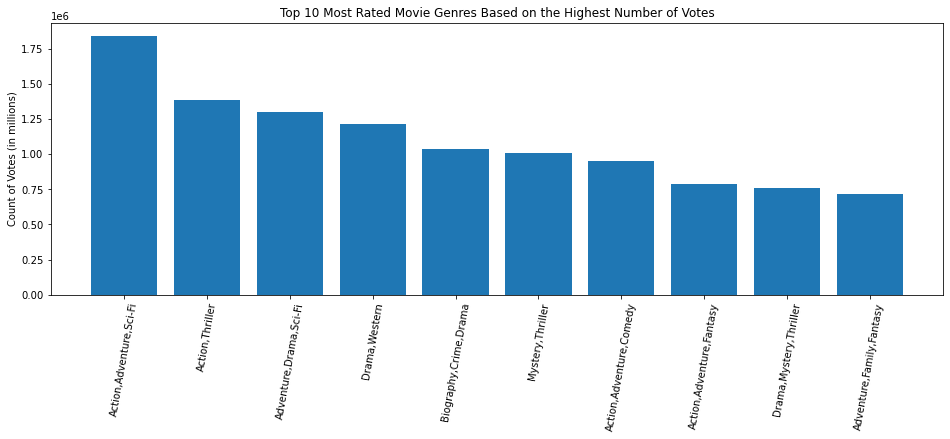

In [60]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes.numvotes
top_10_numvotes = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes.index, top_10_numvotes.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Count of Votes (in millions)")
ax.set_title("Top 10 Most Rated Movie Genres Based on the Highest Number of Votes");

In [61]:
#Most popular movie genres in 2010-2019 based on Average number of votes
imdb_numvotes_mean = imdb_title_raiting_basics_df.groupby(['genres']).mean().sort_values('numvotes', ascending=False)
imdb_numvotes_mean.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Action,Adventure,Sci-Fi",2014.559055,107.864165,5.655906,181285.417323
"Adventure,Mystery,Sci-Fi",2013.500000,105.500000,5.075000,135042.500000
"Action,Fantasy,War",2016.000000,94.093624,6.400000,131509.000000
"Adventure,Drama,Sci-Fi",2014.800000,104.300000,6.170000,99316.950000
"Action,Adventure,Fantasy",2014.533981,107.675357,5.371845,93775.563107
"Biography,Drama,Thriller",2014.818182,112.008511,6.504545,84506.909091
"Action,Crime,Sci-Fi",2013.500000,105.375000,5.875000,78214.125000
"Action,Adventure,Thriller",2014.240000,108.254980,5.628000,74964.800000
"Action,Adventure,Mystery",2013.545455,102.852227,5.563636,66149.272727


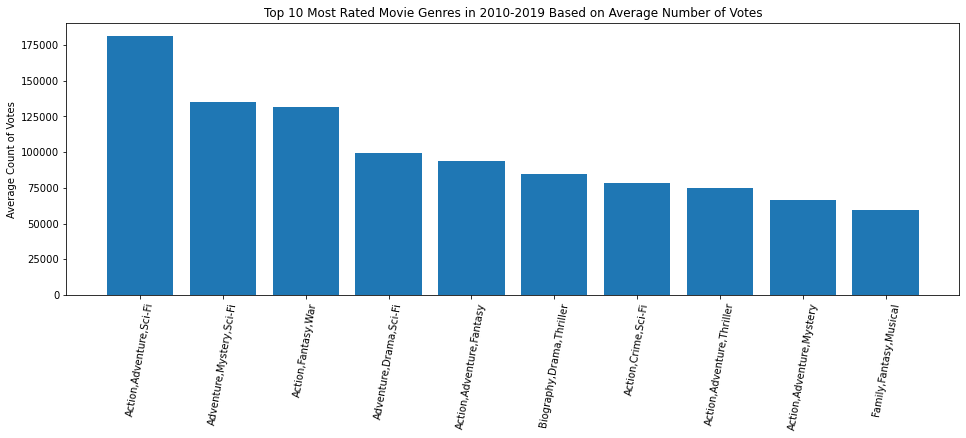

In [62]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes_mean.numvotes
top_10_numvotes_mean = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes_mean.index, top_10_numvotes_mean.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Count of Votes")
ax.set_title("Top 10 Most Rated Movie Genres in 2010-2019 Based on Average Number of Votes");

## Question 4 & 5: Top 10 highest rated movies and genres during 2010-2019.

In [63]:
#Highest rated genres based on overall average rating. 
imdb_highest_rated = imdb_title_raiting_basics_df.groupby(['genres'], sort=False).mean().sort_values('averagerating', ascending=False)
imdb_highest_rated.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Comedy,Documentary,Fantasy",2015.0,70.000000,9.4,5.0
"Documentary,Family,Musical",2017.0,59.000000,9.3,19.0
"History,Sport",2016.0,86.187247,9.2,5.0
"Music,Mystery",2012.0,86.187247,9.0,5.0
Game-Show,2013.0,130.000000,9.0,7.0
"Drama,Short",2018.0,18.000000,8.8,8.0
"Documentary,News,Sport",2017.0,85.000000,8.8,25.0
"Comedy,Drama,Reality-TV",2016.0,86.187247,8.8,15.0
"Drama,Fantasy,War",2016.0,86.187247,8.8,22.0


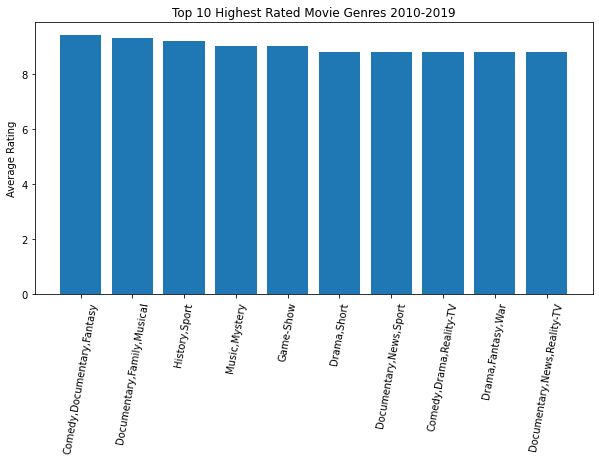

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create variables for easier reuse
value_counts = imdb_highest_rated.averagerating
top_10_highest_rating = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_highest_rating.index, top_10_highest_rating.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Rating")
ax.set_title("Top 10 Highest Rated Movie Genres 2010-2019");


## Question 6: Correlation between ratings and number of votes.

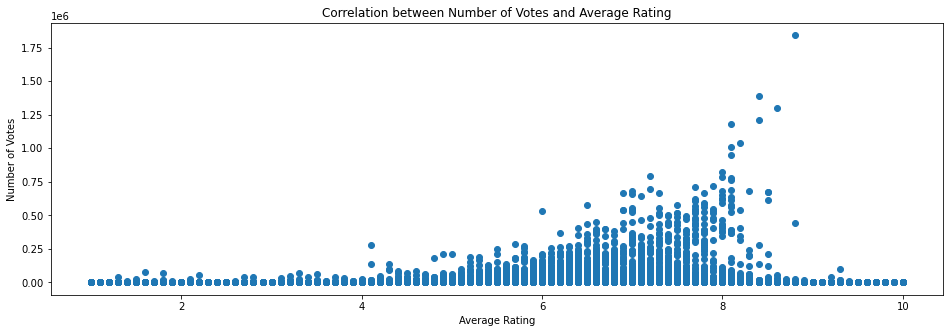

In [65]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_title_raiting_basics_df
#top_20_highest_rating = value_counts.iloc[:20]

# Plot data
ax.scatter(x = imdb_title_raiting_basics_df.averagerating, y = imdb_title_raiting_basics_df.numvotes)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")
ax.set_title("Correlation between Number of Votes and Average Rating");

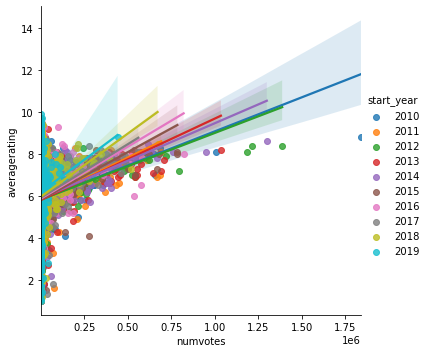

In [66]:
sns.lmplot(x="numvotes", y="averagerating", hue="start_year", data=imdb_df_over_100_votes);

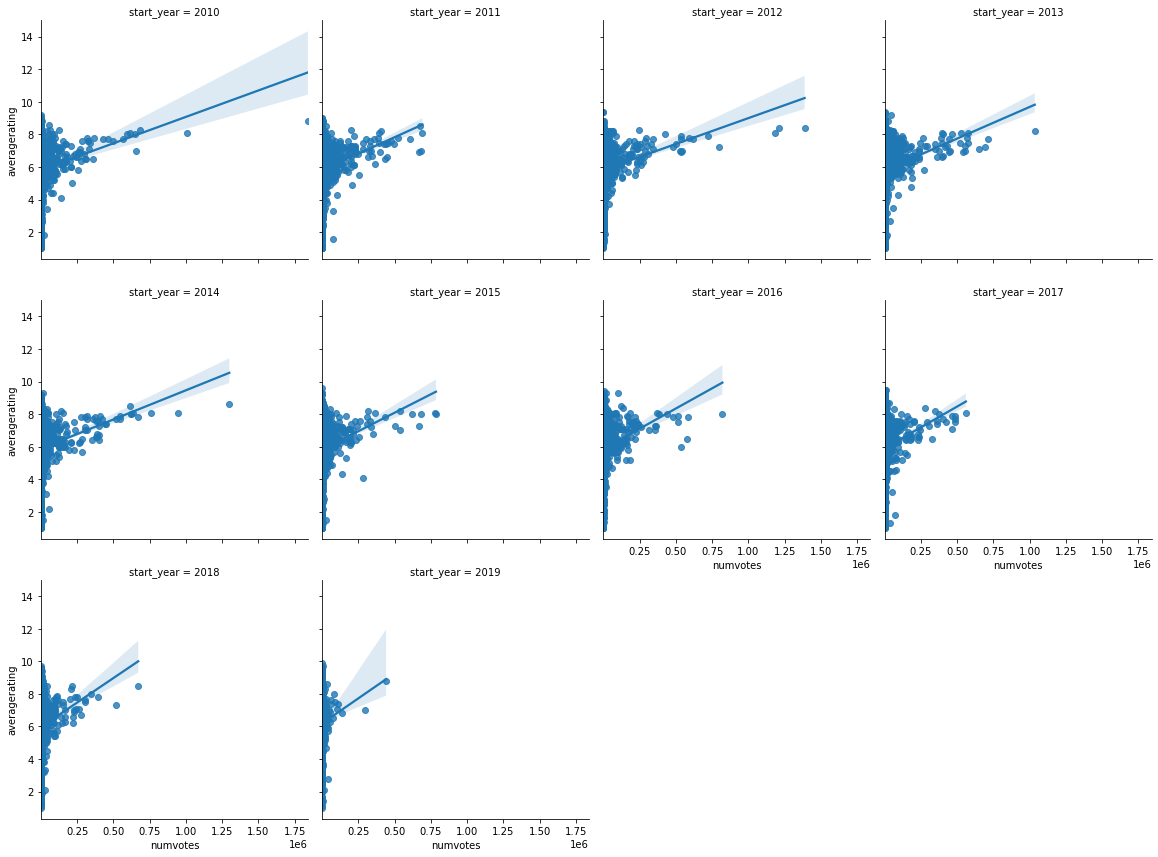

In [67]:
# Looking at correlation between number of votes and average rating per year.
sns.lmplot(x="numvotes", y="averagerating", col="start_year", data=imdb_df_over_100_votes,
           col_wrap=4, height=4);

In [68]:
# Pearson Correlation
imdb_df_over_100_votes.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.061923,0.035377,-0.045570
runtime_minutes,0.061923,1.000000,0.203341,0.124957
averagerating,0.035377,0.203341,1.000000,0.137544
numvotes,-0.045570,0.124957,0.137544,1.000000


### Conclusion on Question 6: 
***
Correlation between number of votes and average rating is 0.13. It is an indication there is little positive correlation between number of votes and average rating. That leads to a conclusion that number of votes and average rating will have different results and should be considered/reviewed separately. It is reassuring of our previous observation of top 10 genres by popularity ('num_votes') and rating ('averagerating') have different results. 
***

## Gross Income and ROI
***
Questions 7-11: 
* Movies/genres with the highest domestic gross income.
* Movies/genres with the highest foreign gross income.
* Correlation between domestic and foreign gross income.
* Movies/genres with the highest ROI (return on investment).
***

### Question 7: Movies/genres with the highest domestic gross income.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Comparison of Top Rated Genres:

|--| Produced              | Popularity                 | Rating                     |
|--| :-------------        |:-------------              | :----                      |
|1 | Documentary           | Action,Adventure,Sci-Fi    | Comedy,Documentary,Fantasy |
|2 | Drama                 | Adventure,Mystery,Sci-Fi   | Documentary,Family,Musical |
|3 | Comedy                | Action,Fantasy,War         | History,Sport              |
|4 | Horror                | Adventure,Drama,Sci-Fi	    | Music,Mystery              |
|5 | Comedy,Drama          | Action,Adventure,Fantasy   | Game-Show                  |
|6 | Thriller              | Biography,Drama, Thriller  | Drama,Short                |
|7 | Action                | Action, Crime, Sci-Fi      | Documentary,News,Sport     |
|8 | Biography, Documentary| Action, Adventure, Thriller| Comedy,Drama,Reality-TV    |
|9 | Drama, Romance        | Action, Adventure, Mystery | Drama,Fantasy,War          |
|10| Comedy,Drama, Romance | Family, Fantasy, Musical   | Documentary,News,Reality-TV|

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***